In [1]:
%%capture
from matplotlib import pyplot as plt
from scipy.signal import convolve2d
import numpy as np
import imageio

%pylab inline

In [2]:
# Utils
def image_size(image):
    if image.ndim == 2:
        return image.shape
    else:
        return image.shape[:-1]

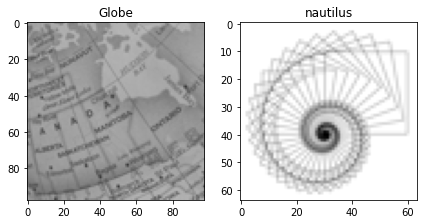

In [3]:
import base64
import io

globe_str = b'iVBORw0KGgoAAAANSUhEUgAAAGIAAABiCAAAAACOzlnSAAAAB3RJTUUH5AcVCAojwn1AyQAAGWNJREFUaIE9mFmvrUlylt+IyPzGtb417nmfobqqurqrG9uyAQsb0YILhLERWOLG1/wWfgK/iMZCNrJku9uubtd06tTZw9rDmr8xM4KLXZBSppRS3kRk6I3nDfofFWv0MNEYfBruhz7Sq8n3B7WEPsJ2GYlNtncAm+n0jHg/FuV+pQruLrMOpAYwyDh8h6uqN+zyEtyu+yjCCObCwSoxVt6skurUX1v7lE4MJoB2TIfsu9GJphRYyXS/FKsQ2Fh6tn6Edc7KQgLw0PS6djTWfVYaLJs+G9RFIfet97knqDnbH5dsUhRsLj94qN5p2iW0ykfie4oC2LGCEgxcNEGQV7yrSiNrm97R/cZN7SGSTgxsZsrqVAnyR8qzjOn4PNXYTxGeRgyQa6KaDIwmTg/dnA+Do/SEfOWJyMjIW7BJ8ZQVBy+6X+2G47s7qkqjp8MEQmxGTfCkSiR/LNNpjNzs8nF/3Fp8LDLAnLgqsYhoW3Utp3VgY07OvIEYBlDhNnPbF2mytfY5xChtPx6bDUNWH/LkuIcNgZ0QSP64WG6ed4P0zPtN7CaLnAkU0ukIOzYWv0nd4UAa4m57Gu7GRAwDEanjYe5I/OMzcX+TmT8hG+oqk9jFfV33kcEgYvnFRX9gj97Wu0ObLXw4Npnrb9YtF4WryYl1GYUICqPrqtMRjIkBguTH/YjCbtftg/fpjZ0z7DhOKJI2gIIgbKRR/nO5IW+ua7Zxcdr22dDvk/K4oW5b5n4fRPIjhKJR9lGpabl9eF73TJsmBfIRxaddH33ovasqh7gvUyNmFiP2AAFk7JZPg9gzY+ZnadTtUigf2V6jCFFNIorxPrE2R+jDvfDaJHTP6dDHU1XCfgsBin5dZRGyLYrIkRzIERgwMIRcc5DdfrFN7SI8bPdp9PM8UVdNLEued0qB1Ps9EUWyrjEYsyPrJM1UjSlJuwCo87WI7ovcCKzqQDCCMYwQXQAWh+46uceTy5LUh4fplJawaHrsiFlZeXPqIOOiz4/MYhbnFXMamLq+PNseB6OY6m40pIkZwzwbAaYEEIhY/qIe5CrLNnUcZrOyc9rPvPHw/eMmm3aRWeKBquPsZF5FlwwmFm18mXhHYKxvrcrdMBhIkgceM0iFQBBEERABIHa+aCeLD/frcpbTwD7YrAAMSrQ6r54Y0uZeucWu7acnyXatZLmLx908URA9ZGUu9w2Y2rEexkpsIAKIiA3GAJv8eValjzf91aLQNl7n2aIiIguNsR2VDcJPQylr7fqAsUuGjmlc6NOaR2aZk9xBsj5mjVRZNzhiMBtADkREAIMdeX0flj7RvnOnz5vzMqAehjYQHIV2mNSrm9/jZLSrvOuaEYPSpMTQEpsZZhPF4JLTNpIa5/VhbEQKITNmBQEq5Eg37cjxEIey/OLdVcd82EUnwtHFPeXxWd7cvKWs6T04GspRQaRtTyMApoDux+I0jztzKPs2JzJTR1B7yZXB9ZakNmh9n9njd2XWvkuUPDNBDmHMX4e333zWmPnp1lmeKSpEmOVj9jADqLlNabwukt4skmXdfgxWgAlGpICAnEiaus37MsmPZxkHMRMAxLzH4sY5/vIygUZzsqumXtmUyCy9tggJpLtjiTbm48NgFr0Fb9uJ08iBmF6WwTU4dm67+Yyny3p2gzw4SGQWVPU/nL/zP+/zqECQbJNUChgMoJctduQI7/I8hqhRBqboeFtKcEIqAIFgkE9vv717TF5P8fQQ5vvgQknMbShwm304fDzJRSNFKIz83GAAjAAAMN0dqAhDlQESuyhiBqTuAGGBIxiiEOB2xTBbTs7e3dj4OJzeEyvXsZBvYqOL15IFJVZSGXkfNtPICtBLwRPtH/0+tRPHGt1i1MHtBpNIk433kVVAJkoE+dfpyfy0Xm2qRcH9vNfYdulIHvY9p9c5s7IRYnqdcZZvE4EQiI3I0D4202PpZgIYjNKiyDMdgsL745AKYMSkAOS/FB7tzk1TIo4DsfQn7tv96WH5k4n/oS4hXjeP+3GyLY2IAGPR+v5sy5pND57NCEaAupy6KOTyELwwGUFgQf49HEvmmDkxbrrS99/ujlRfnqmBoAAB1rTS6zRvQ6oGEBDjwcjHcXmjpbHRyzMgSUMAUdIGp2Yg4njjmNiMwRy7QUsOSaIRb4pEBZGYDQGmjBbTRKuHzBsAi7dnmd1PJnIY3Ux9hJkZQFAqk02vFIt2OxkEAFTk34kkTJ7RduOs2eQF2ezHqSNSEBlUjUAaQ5wW5uSYg4B4kw4uZgsfvloSUiOLSgCRMTi3TgV+GAqJkOgqHlolCjW8HNf3D3tHfnwKAoHNzCBMUAM5IWYrrGGl9XNI+5VMnu5ksjqdGFRZzCxEqIFSMTWreEceXafksrCvkY0RuQ+uKDw5ixiGJCFRwIhEoYwBrEqYPKes/nG+G03K/SNjnomBSEEwEABjE1Ii6KjeVMIWgpvF9zbrGzRzrhaZSQDvqAuFY2KYGkxFo5oigs1lm4UWDlmZaZmzK8kAIzYDGQgghSRHeIbmw75MopLLBwuPbdon3XyU8hBU67vFUvs+EzUikLIRyIRhSnH01OQhw1LUqMLcjPD/owDtdxcMdhSQEjinQ/qUkNOI4iDpmDPXGKkOx2bzs1TjUIAtEMAa2UUKXQEzYLrFYVKoAjYhAxRsgBFY62F1QkbmEDg6Uyrc10v34Oq/HpWn5rVIzDfWDsf9Jz66mLWBOIINrACI2EBqAtftXnmD0v/TKgKMyIik3y5DlykBQIBzFvPz9yeZi5sfnUsM8A5Urx+vr77ez7ZTDnVMjaFkSjKYCXlSgNrjSNQMBIMRqREZWwRgtCw/HIaTNO57i6QKHO+v6HYk//VVxaDUo393/G2aKGtxExaCjjwIZGQgNVgYp0a2O0xGsi6gLwwA/HC+dAbptd9n3UMkIlCI3VOczoJDAVJ62LRZ15zgerPTar9qE5c0qYexMdTYFMxAu8tOyNJ0NzUzAGAYGUDycqVTDpu7iR/sEF4x1oe394fq1Bm3dn9MkMb8NFl9lw6xn41NHw7P7VuQUuQ6cQEc+nI3TJOn47UbP3UeRgYzIzOC4Qct4JNV2eh5G3/5js/6Q7e/1mjyp+v7x03/6TBPZbvdtiNJi+v5Gqu60SWDVrJdlRw4HrZajJPjc4sx8T4HCADBiAhGUCKz2iTrmqFZVtKaeyrilEkgHx1K8aeab25oFIdX6dVV+Ry/2XM1S0uheDfUNvbWb9fH5OJwf+woy+F6TQAjA/3wIUag5uH+MHKjEH3tTtO1+XpeKWuUf8Meo7DajYvJKvlsNvUav39KislFGevseGPdcpZxe79N5iTN8+hYnRNZuvcC/KAZAAxA87AJIStRMD8khdzXZ2XBYuTkTz01D0NTZeP8cuE1HL/XUTPLz8Tt31WPGF/nMmxvaTGlzepiqEPMEkCozsAGJpgRwITm+ahO0yk463FKH6oidWQAHeXzwUkoLoXPxfDu8Hi3Sy/n00HoIVmTu5jKsL2tZ7NMn3b5Nv0/7xc0BqnvY2qAvqQqdPVm3cCMQCycTei7/bK8GgYDc+3Sare8ouKvvvlPfTz0zXRRTs2U18fDx84u0lA/HMdF98ydySjjwvL6MFHqu8dz7urWJd6jqaPFALiI/jZdVoz18dXXb5L5Q49AFf33E6QI7v5Zxv2xSLJZsjnG7MtkUlzUh5SejsW03xSPeUsX6YDY+yZ9y/VD02rZeE+IzKYgRAarwkCXldnxJi5kvt3AnJM/z4UAml5nNk9OppU2X0/2e5//aMK2u1u780m+m46banpar6YMNoTUHjtk+4Yk8RAyEjJzXsBkxNaPHKVVu2s5a4Nz7JQCmCxYWbhR3D0m57wP1anVZfO8jstFwlzeufkItvqH+nMzkrj1mpnMHr0Qee6DcBQRUzYjr9Q9LpmTs+8Xz+jVyBz9UHgUVz5ssH31VC0y0W6zOyQXvUu82sRRGkzKs2/bnyZhI4k5CppmfQVj8yQEYjJWE1Ow1B8oKbNZb5bs1IkDkalZGu/tax7p1dJIQtsdd+PzxNWHwYFoZFGM8t3Pu1D07yZzVYbGpOsLBeBIOBJDnXKIoL4rOdzzmt5oS6FJnWpkAfO2C/l1krGFOBwaFJ4nkfOmywQclRhILt5SXW8xNvbg2PN0l4kRgQwCZZiAhNvvhvLjSKGyLYSGXp11CcCmXJ9ci0DbuiGuCsaWnPlsqO/uPz03DULlT4y61fpiTuRsEE6KeJxHpmhMACSCNLHdNnv9JRQOTGROgjovrNE4lp8ytV3ftlzkCTOTtQlTGr96+vTvJok5HzPCdu8uLkiA/m8n85Rnj22hL57OLAhF44fnhr+5SCODYAwWqGMFWfx+Mtau2/UW5lVBkQmWHRND0lYPr+82J8xmHOohuWQwnj5c5qvHnyU2WeesCVSFBoKRfXUIlV9WwetL2yXvO0chMe1++eYn69pXvD6cZKLOArnRoxHE+eR/6ciESO1xd3kC1Xb/RfFl+jFyjnm/mTkGSJSZrJOhY7fIjUiCwALDJHPac9sfryZPz2kRn+D7F6qgh2bU5bBk8nb1k4JAZnSRVWHUvn9Sz9lF3goDk4e+IEDAALov9LL7KPGOAWOwCkB6dE9tQkP2M9/vBLtLSweNSoC7/eoPJDd4jM8SM4nGmov0vxl2P/1mFF8nOxIm5dk6EzYjyPBVNn6PqzEHVoixqgHQbS9/7IqddvtuqTN+PS4pJMIG5qf+29EcILPOO41MDPDh/SGdfeteX+RD7VJmM4c6NzBT826TVsnnBZuDqZgRQ8C0A4/SIk3Ua3J9foUYEL9RIoqk6eerHqrIYq2iQmTD/kP3893kpz8uSRXCZMRUoGEibZvmd1t6zS+gTeSZmUggJ17+JEyKqpokI7aBvP1vuj33UOLj1dtlnYHIdUNq5mOIvwxPzr/2OYModmlKBIP4Q+76+m+GNX2a5YMTGISgICI1AUbOKedEOiIbyFvif2vbEQThSkJ6HIRUfD04qYe//tm5jC8XeVSFIkDgLJBZWm7dd/04/T0VNmYzgio5UiNiKCI7CxSjPPxNYFHQ1SWvVPWlH7uGhILnw7r/5eD/MZn9/qWPBlFARRDBMAul++3puavmS2MSZQ8zIzY93O8IBJI/7MvUiG++PRlBDeh+KgUBBAbxsQBB+v7X616z3ylnnXP2AgQt5UJkZEycPt7j4uwHmmJ9MQHDuk9qJwDJR/UyI4sPm+fXAJDPjMkxE0AkjTiwxpjsrsev80SDMhnAFlrJDfZiYHmsF5UyAUqkZgrDYYesJs1A5n4SeqhZ95nuZmpmTjjghSuMR21uIZaxmlwamZLTwYMMLHkf5QX7QVrOlWBMUUhhBrht3Z24zuLjfFvL57t0Ykbl4jRRMMgiBu8AMILy0QdKmIapMzv2q8o4sBgRtIcH+CUSc5tECCaJKV6s8CHvaojVj89nrurcILDSBoYpBXhqo5EhBqeO6orJvBzdNv+1duOxC5EIYO8b8aIvlp6S8XbJMHUIYAX6JO/z7WlaP4bCyX/L9iUTBQaTMal3QcmTUXRMXtrSlLh/2G6+OkuXqIwoAmZMdfRiRmQaBa4JuQ1pwhaYYlTLm0798HAcnXj5hdtnnggMMEBmgj4mRAQVIld7r883+19b5tzJdWpsxC8emzp2TNHsuM+Z850TY7Y4PPUOohjt6bBqJ9MC8uPFMc1+GEYCQm2r0nkHuMExJPb914+n3+bDydvTkWonTEoGUqYmOAd0z+tu5Ix4myEGPTwfeOrTJGkoizY601Xi3Ma1JSiIUwtHvR2y9R8gZFB1oOG+2SD23cdtnrp+UMqjOiIENeN830m3qVEMgFne7cam2w2dZJwb2ra8O6SX1eNz7j61rbIGafruIXmm6x33X533wYnJ4ya68y/P3Jhmxf6gXkkgMXiDD8Fckjb7oRkviGVocxs/9OlqwIiPXCjzukk+zvP0Ot67RP2x7sL822cfP3vk6dH/C2hHUodvJ/vZsH5dLXzPlLWHMmME4hBInYsaDt0HXS7JAXq7O5tYsT4FtMkW2UPq+JPVqxQwuhrJn9nQN984rwe2MHlli2ma2/qwehr9XZUvXHbdZ71nI6q9A1M0QrQo/HSrWy5Oqsxo/eFYrGZIhsNsnfMJ3Q725OvTQhEUbuTADk3RviumJ4kUKhTj7ejLokn8j8sqX1pMd5WLbEJNquZjhCBSyHRfXrrDQRnP2zAaMqWQNMfZ6mzLGzeKfCHGGqEOLgqj/DiaF8CMuPn7y1W/vDu/wtwBgcztJpGfkqLYtXl4UY+2tuYEo8TCtu32PhaVHh+WLKPddNTmu+Vd/bEnpRhFQCx/Rtq5sQigBBjbw8aNZf6j6YheRJVMN3dPzZS66ElhIWBzv9NlFg28+07S/fzctuPa5QPFg4wRt5enHrAY+oQJ7CLY9QaDQSmC09P6ahw2QyQyY5XujlYV0aRNil1bmFLb0WM+8jX12+JxA5lL7Jifs2cxznfry7B7k2lPgFEKwIL8B5GhLoWAGAlCNj1JlEKXMsOe3MP3W+4ovxg5tkY9k+EJkysf7Wa/2YjXyUk81L6R2teZ9Se2LifjSMYAkAhhvZI/AdshyUAgYfcytjKy+ph3ere99w+lzxenEolNW/Gm4CrpEd8ft5rZ6Sho6GJ7HPrYDM3kIgnT74sExGDyxMNjsnBMg7h2pA7KL8NkkFl62ND+yNB2fp3ibmDEwEnTiCiPB6VDnawudvOE24N17daVC8f1fJrTrNnS7VtoZBBj245Tcg/x8Na3w8sAmdUMAhiPDysLs+x89T/zK03qkSqUsqZ7ClcM2K9/84uLYtEHtG+2h111Ona2BAiHx8NufNX1PdjldqCQMdz7dDwk/eBgRN/s/xkrIkBxlMqZy0Fp3F5a/pyrIcZuZbQZTSPotMv8sS2O4Xq+aA+DjPvC9PhMvA4iekgnZP3K0oft8FrcOedwURnGOH7zWQYoRRf2epE7U8v/I3cg13hQvWo7uPNkQNSzk/4B/ebkba4o8hV8qRy/ncdxvyxvNudeEFsJD/HTSRzc1BNFalKjwB9fcaRgh5VYbatXEhTw0VT0N6Pxczfu0mQ0QYBq4FAP+fk45UAaTohseLpYfv9RNSW7fiS27kD75/TNUoJzGhmQ2qXJZnNaH6Da9+4wzvLYMRRswZnGfT9siiOu920iFJWbo5su+83JOh0ZJcaHp+w5uUzksAiQajM/2GFTnyyWsN/s5d+yAVbH3tqt2x3avuVsUpYnBfo0WIxQqKaPGWYLV+bWk9PQrOnqTZqEoUmPFYNYbvtQhNGMtpvcWbJ9ou2eX13mgTldyy/YiAWpDdwmTJPJuFxkWcJoe3GwCFMzKz7cvskTr6pDv2uzH70aSyO4VHfBBGat+lhf5e1v6f1+zpu4jfAfTwFj8sEFYYA9V82Q+QWZkSCyRvZNLaocjaA6qt41o8EGi7vsdFlCAWpGJbbRMccoWOz+8vZfvVuXH5/VG2vHu8uJj0qs+/pJfoGobBoSFjLPamqqNrBRr6KGQDoYtJxX23vVdvTmo9kLESJFZLcZ8/bx12WWjYcUzXQ5ORzrD6Ec5aUZMcVwN3fB2EJCIYLTdl+KmQIhGIi71pNCYyCypj/WnX06TwiRDEyYHG9vLz7qbo7rT+12zHtPx1L6oamHRfmGbuqS6BCesvxEft8QhsEikxFq7zQYmUaoUadeNQbTqPX9rl+4y2lh7BzAJO3dw8khtc13foqrH++/cEnzyejYHd7TJ6cLo/R55OLDjWaLRP7ovt89bXIJYqoDRJVUdTBVtCFB6JqGhiP7N1QlLUYst98vvR3fPYRRP4t1d/nhswndf2h4ftok527XfpwQORN5lz+vJmcL3DrP0SVK2nvAdOgNGtkGIooSdqEfejqvJuO6VvvoH9u64q//fqZ10vbT6y8uflUths9uxqsmezsawonE8RmG4WjTjMfJP/nlKfPxL+Uv4A/DhbPekdHQM8gAtRhhGO5q5Kc/O50klOzyfuaeStcV2TAUSLlvnu5OX83Cze0On7xRm0yF9NCcnRa5bVwS7f7iXGDu2g3X+4fHSwBtCqFWUjXUbQgRpSSfTJPaMjUCTVe2PX14n04OE5wkFX05vis+6ttfhfRsfNnvy4II3Sae5iCfJBtt8XnrKJoU8jmWiXct0SC62x87iV29qduUs6vXZ7PcNYYsMrFLFk0eb8bdKD3H5u7u8y8nFx0mw/ST8/b5dO4MOD4kyyKsvhhnKd/CpyEW3D7/k/zhcWT7w+aoddhtXFp3CcZn5elplS9SEIHrdsJEkPCchbOVXJ40t9uindOUuZoWZ9MYKuSJOX3ezWbu/gPd72ZJMi65DjHpb55yd90oRpjYZChCd5Ju9mOe8lpD3m5TAtu4d0SReH+/dN329d32/l5+Pnx0PE6m3qE+YpQDu7T9h0l1nmzW39dXP71QUEFarMq/KrPkwVUcaJRDxgS3Vf5OspSQ77P5074dgcJeCqht22Y6l92Xh10/+Wgaqa2yxIX9QSYplMa3f/uju/t/zl+0MfxuPldihQ16z/7pdw4/cZb4qL7rh7QZu2747exCiNP1MK9cRsTdV6NFQOzH0xOycjEyP1+u98uJp14eN68rVZB9sbX1/Pe6X6Wf/+ZfpqmqmRH1hyYPJydn/H8BB/fKdiBVyz4AAAAASUVORK5CYII='
nautilus_str = b'iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAAAAACPAi4CAAAAB3RJTUUH5AcVCAsb82TJFgAACZlJREFUWIW9l1lvG9cVx8+dfUjOcDjDRdxJkaJEy05sx1vcOkmDokEf+hT0sQ/9CP0G+R4Fij62D0WDoCgKFAEauEmceLdkiaQoivu+D2c4w9n6IDteRBsIAvQ+Du7/h3vO/9y55yAHftrCfqL+/wAw9gYA4LT37R8N0A80AKUQH8xhcoD5mgCgVXuv7yLeqLfKgeOk2czR7scsmyPhUFHGmK8XRK9uQ2tdOBG9UJT85m36fWS2R+Z7mD2vDC4JFFS9PnCMlRu9FdCb4ZjpjjgnOGBMf0MaNiTFE2wGObAH9YhqEYu0920hWIM8XqpcNMu+kHyPuGk1NWNxDnTX/eQKaI0JkGi0+AHw+gnMmiTUmeC0kz95fClWw2PVcsJP2fu0H7kHfBygTfkB1E7mTYCOSo8GP0OV7fkgsdfLTCoSUdvwEu5mnLet4wxCWmfTBruedgCsMHcWcJClCtzy8AKpU/dZNJp+vEFaR/6waT3dYmGw2LSwYoJxUGkTB2xiJM7kQCWpCR49ulU7XrWuv8PDA1MNoYvHnTjsnuTx+IHtgrDqA+AwF4BLhlcLqf60dkiYrWSd3y9kbn3kGU8dbts5GKMslGx3pAQQqwP4ZgDAqOtcULNmi/refjIbTH7rB9Lx9jrdjXCw3k/Eh4dbolbZ5HtjkaRkDlzzNQAL0Vo4LAcfqPnpeEgami8Jy36bjxsNKs4W05HjdiRx5EPikAN2sAagkTAOtrxfpH+Dmi7RkIsdA83D5LKCJLMk7RwFM4esz9uJCB0bo0wHvQow2vjIIE/Memu11QS1sungJkYbGKHp1uZoQa/KkZGWO6Rj+wHSNRURblCvAmQ9IQeMhCxfZZSY7VdoWzMY1lEkzDqiI/b+BaMBRjVbzofrmUBHBFp7BnjuAnIzpN+i71/LJxdLeWiUNTZKejgKQCMBpjyi0vMEV42U/KuFxzBe2PCDjQgse/UfH1YqQ4lELjIZ9CsAALBkAUZ+gHYQD0ZbXCXRAH4C7uWrAEcd1VtP7ospPZfb0Vsox6vAnu5ZusAwPLCaRgAQFsNm7Cg4Btp42QWngCsIT41iH9qPDIfgV1EQhwnaOjUnAGMeoB5GoFd2IFXydiXQGNvGXpzAcXLpDQa7lx8cufr8KuYbgm8BOFgAABYNEz/IpgT2UZoCCHXEdmAIuP5SCBhhAWjHehWyGc/9VCDRsXF6BoQGAAaGNGCgEQc4CnEAk0Y+PGHmwGov54BeLmqHrd+Hlu0qH2wAKbXAPwJWBUAaBUMR+qwbqq4AQKe7Q0Okzygu9SWAPtkbifgVr6vcY5wrZB3CM92rOe4lAFJYmIt2Pw5dIw5QWe4QAL4ZM3xuAwYApZoQ2aRK3uLqF/A0CkmtjyJ1cI9dOiB56cwYouknZqMsWAVmEwHMDwIbCm695EKEqaKRWniPK/qpUpLLHjDiQA413MrjplzOtUKOcl6r7yCtHPUBaA3I0MDK2OlLg38GgCZib/bg1vXCXlrZFk+QRyj7+FrwpLfnKtktsp66K85GaXZ6kuHBavUiEQKAGuG0o/OnAKYLBUG/MjeS3wUDuL+tiq5KVCm22qPiApsv+9158gmPrP42DYMan6IBAPQ2D4TOn/4TlTsRXvvqV6tUxdDpsAB1fWvUU+9D+UIAWMv2nphHwi+fRi965KYrhgOAPpxTG6YsTGMAyIGaLsm+6pdXz43ci5zRMBNsf5i53W2hXUe2WXLOMlJn1k1cUwQtzgKY4wny+QjQm8FZDIAAQJw0sJ5evfVoiiJAZRZVNuG5Y5Sl5FjIsASO+mYx71ktipN38oQ9G5nPgqBMCwAAOWAf7B63lztCP3Jo+kg/h0ZdofxflF+kRdNBgPEr+Drj/YL4tb1hLFx+9/P7WxRX0dMcjGoEXQz6cseID8hDzRNg9r5pndPS0sq0gSYo1mC/DCa/8s8yuxICALB0VdNMTNKip3Wg9T4YUI8+eqyRIYfjnFnTmVPI8Ejq4tt9K/ZBXqP0Dx42PcWfJxW/vlQ1AwjW7afRzDmtgwrk2+KD67utjeZCGck6E+BLe14igeZ//pdjVx9zCRyzLOLcgCyS2sxmhGBA5FgCgb7iAQgAdukmjwW+G7Nj/oC1XI5XtmYxFmt+//WVkGQ/+jy6RVDcgYUOr/mEALy2MIAwdHE59HDgHQCmG6R3IxF1UwY41qGr9qc/wiXjrm1CKsLdpLmetdJ+WCvNfnYXNr+ld3ulbEE2unEAAESYjoprwMojVS187OnohG6YTX74mPeqL/VaVvgZQOEd9yp4/iTddbIA4Oia6BkIk+CNf69YM4uTAOCQbjb0DnWjnXq9KyMAoJgjj22+a9JgTpaaAZQ7Wa+var7UH/45u3HlwPZT4GHoOhQ+uXfxTFeHHIBpc7vRdCrvopkm5BgWGUOl86i4Y+cYw0Slo96nV12GVhWkh/olLvY6gAAAgSpoO4MHqUVs7IjWYIL8Aaq/OEg/8bj08WB4fselEMlB3zj5mBlE1oUALveM8HKm7Rorj2l+kxwVIzcdvMKwzkpRdj4JyF5mf3hhyqq9D9aGAMvj89WR0t32lAXzPWbRcCU6S/FhpzY0MG/2Mr+SZrh1yNL7lwKCdy1APxIjt4P3jU9b4oAFI8GUyfBRsmnKGin4LD3Q2hzdvuL8/WdeEKNrCgmA3kX3uOiWQ2H09Mk4RxxwiVKqG6Jz21EJ10KdrfIwWqP9s7F0Rg/4ZwAAiFvqNiMfk7KTs7VmQioFcVnQMEoVVBp3YLW3y/5lZ2sD95wBPH9clXejrfTy+ws+fnnX5Bsufz05kFTWYXRpGL8z3uxTIaE1WNPbP/uE+MLYH7xMlsnx8Ab9TS0+4OglbzA2aTPyXdqIDv6a9YjnzlylF/1BaptoyNzOg3/o5xldYwr7wsgFgNmGcnem5wkYXY56Cfys/lkOAAAj8Izazk/m+Z4a9Dccq2Atq9jRbEJHZqHG55sexRaENYAXXZoj11kx9P6jv8m/m2DKtT4htT1LFPEotPOk8VGaWsbJNfoXJwAiSJlN0tCz0xq39+GY0UOOHTVZW6fuWNuoB2Z4nf7lPhH3uEMpZxkR946P3cGHn047N9uly0dPg8lNItzOvmHoerVbPzHxeoCvRIlHeN+SKoIwI/l0eLiai6Hgev3ZkaeNi9VpqGtv1frZ1fGWVLcX12tbS/ebxrszALXippsX7e8kcarz3qeuS0VumJTeoF4HAACozl2kmmj2djTLnma99tum07UAy6ShYqaIA/+GrbNvUb8J8GPWTx6+/wdvgcRg3TfVwgAAAABJRU5ErkJggg=='

image1_bytes = base64.b64decode(globe_str)
image2_bytes = base64.b64decode(nautilus_str)

image1_file = io.BytesIO(image1_bytes)
image2_file = io.BytesIO(image2_bytes)

globe = imageio.imread(image1_file, format='PNG')
nautilus = imageio.imread(image2_file, format='PNG')

# View images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,7))

ax1.imshow(globe, cmap=plt.cm.gray, vmin=0, vmax=255)
ax1.set_title('Globe')

ax2.imshow(nautilus, cmap=plt.cm.gray, vmin=0, vmax=255)
ax2.set_title('nautilus')

plt.show()

# Lab 5
# Space-variant Blur

Instructions:

1. Proceed cell by cell. Each cell already has some code, but it is incomplete. 
2. You are required to fill in the missing details. The places where you are expected to supply code begin and end with `# <---` and `# --->` respectively.
3. Please read the comments carefully to understand what is being asked of you.
4. All the images are inside `images/` and have already been imported. 

In [5]:
def gaussian_kernel(sigma, size):
    """
    Returns a `size` X `size` Gaussian kernel of standard deviation sigma.
    
    Args:
        sigma (float): Standard deviation
        size (int): Size of the kernel
        
    Returns:
        np.array: `size` X `size` Gaussian kernel of standard deviation sigma
    """
    center = np.floor([size / 2, size / 2])
    size = int(size)
    kernel = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            # Compute and assign the value of `kernel[i, j]` using the Gaussian pdf. Make sure to use
            # the value of `center` and `sigma`.
            # <---
            kernel[i, j] = np.exp((-(i - center[0]) ** 2 - (j - center[1]) ** 2) / (2 * sigma ** 2))
            # --->
    # Blur kernels must sum up to 1 as they must not change the overall brightness of the image.
    # We can achieve this by dividing the kernel weights by their sum.
    # <---
    kernel /= np.sum(kernel)
    # --->
    return kernel

In [6]:
def si_blur(image, sigma, size):
    """
    Performs Gaussian blurring on image.
    
    Args:
        image (np.array): Image to be blurred
        sigma (float): Standard deviation of Gaussian blur
        size (int): Size of blur kernel
        
    Returns:
        np.array: Gaussian blurred image
    """
    # Call the `gaussian_kernel` function above with appropriate arguments and assign it to `kernel`
    # <---
    kernel = gaussian_kernel(sigma, size)
    # --->
    # Since the blur is space-invariant, we can use convolution to implement this.
    # Use the convolve2d function (imported in the beginning) to blur the `image` with `kernel`.
    # Ensure that the `mode` parameter is set to "same" so that the output image is the same size
    # as the input.
    # <---
    output = convolve2d(image, kernel, mode="same")
    # --->
    return output.astype(np.uint8)

In [7]:
def sv_blur(image, sigma, size):
    """
    Performs space-variant blur on image.
    
    Args:
        image (np.array): Image to blur.
        sigma (np.array): An array of standard deviation values, dimensions must be same as that of `image`.
        size (np.array): An array of blur kernel sizes, dimensions must be same as that of `image`.
    
    Returns:
        np.array: Blurred image.
    """
    num_rows, num_cols = image.shape[0:2]
    output = np.zeros_like(image, dtype=np.float)
    
    for i in range(num_rows):
        for j in range(num_cols):
            # Use the `gaussian_kernel` function to get the `kernel` at pixel [i, j]
            # <---
            kernel = gaussian_kernel(sigma[i, j], size[i, j])
            # -->
            radius = size[i, j] // 2
            
            # `start_i` is the starting row where the intensity of pixel [i, j] spreads to.
            # The `max` is to ensure that the starting row is never negative and outside the image.
            start_i = max(0, i - radius)
            
            # Similarly, compute the values of `end_i`, `start_j` and `end_j`.
            # Ensure that these index values always lie inside the image by performing appropriate checks.
            # <---
            end_i = min(i + radius+ 1,num_rows)
            start_j = max(0, j - radius)
            end_j = min(j + radius+ 1, num_cols)
            # --->

            # Add the correct portion of the kernel scaled by intensity at pixel [i, j]
            # to the neighborhood of [i, j] in `output`
            # <---
            c = kernel.shape[0]
            try:
              if ((end_i-start_i,end_j-start_j) != kernel.shape):
                output[i, j] = image[i,j]*kernel[c//2,c//2]
              else:
                output[start_i:end_i, start_j:end_j] += image[i, j]*kernel
            except Exception as e:
              print(e)
            # --->
    return output.astype(np.uint8)

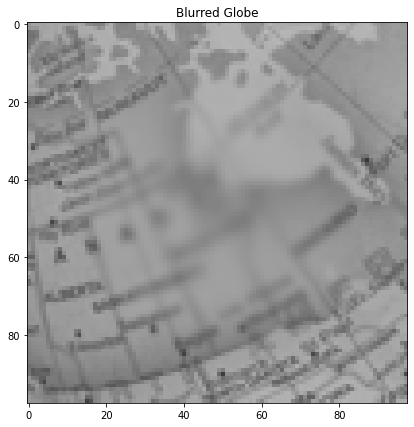

In [8]:
globe = imageio.imread(io.BytesIO(image1_bytes), format='PNG')

N = globe.shape[0]
# Use the conditions given in the question to determine the values of `A` and `B`.
# <---
A = 2.0
B = N*N / (2*np.log(A/0.01))
# --->

sigma = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        # Compute and assign the value of `sigma[i, j]` using the formula in the question
        # <---
        sigma[i, j] = A* np.exp((-(i - N/2) ** 2 - (j - N/2) ** 2)/B)
        # --->

# Create an array called `size` that has size of blur kernels at each pixel location.
# Use the same formula (based on standard deviation) that you used in the previous question for this.
# <---
size = np.ceil(6 * sigma + 1)
# --->

size = size.astype(np.int)
# If size is even at any location, we make it odd by adding 1.
# This is just for convenience as centers are well defined for odd-sized kernels.
size[size % 2 == 0] += 1

# Blur `globe` using the `sv_blur` function. Ensure that you use the correct arguments.
# <---
blurred = sv_blur(globe, sigma, size)
# --->

f, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.imshow(blurred, cmap=plt.cm.gray, vmin=0, vmax=255)
ax.set_title('Blurred Globe')
plt.show()

### Comparison
In this question, we verify that space-variant blur is identical to space-invariant blur when the standard deviation of the Gaussian blur kernel remains constant through out the image.

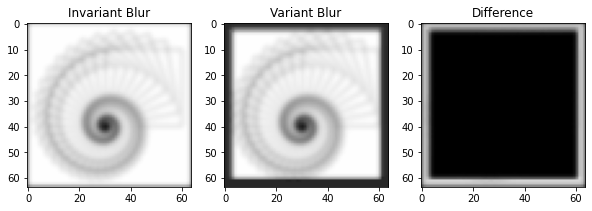

In [9]:
nautilus = imageio.imread(io.BytesIO(image2_bytes), format='PNG')

# Blur `nautilus` using `si_blur` using the parameters given in the question.
# <---
blurred_i = si_blur(nautilus,1.0,7.0)
# --->

# Blur `nautilus` using `sv_blur` using the parameters given in the question.
# Remember that `sv_blur` expects all its parameters to be arrays of the same size.
# <---
N = nautilus.shape
sigma = np.ones(N)
size = np.ceil(6 * sigma + 1)
size = size.astype(np.int)
blurred_v = sv_blur(nautilus, sigma,size)
# --->

# Subtract the 2 blurred versions and name the difference as `diff`.
# Assuming you did everything right, you should see a completely dark image.
# <---
diff = blurred_i - blurred_v
# -->

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 20))
ax1.imshow(blurred_i, cmap=plt.cm.gray, vmin=0, vmax=255)
ax1.set_title('Invariant Blur')
ax2.imshow(blurred_v, cmap=plt.cm.gray, vmin=0, vmax=255)
ax2.set_title('Variant Blur')
ax3.imshow(diff, cmap=plt.cm.gray, vmin=0, vmax=255)
ax3.set_title('Difference')
plt.show()